# Unit 5 - Financial Planning

In [162]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [163]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [164]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [165]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [202]:
#Getting BTC data
btc_data=requests.get('https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD').json()
#Selecting Price
btc_price=btc_data['data']['1']['quotes']['CAD']['price']
# Getting ETH data
eth_data=requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD").json()
# Selecting price
eth_price=eth_data['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63226.53
The current value of your 5.3 ETH is $19792.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [167]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [168]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [203]:
# Format current date as ISO format
# YOUR CODE HERE!
date = pd.Timestamp("2022-03-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker = api.get_bars(
    tickers,
    tradeapi.TimeFrame.Day,
    start=date,
    limit = 1000
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-21 04:00:00+00:00,107.60,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21 04:00:00+00:00,444.45,446.460,440.6800,444.39,85377983,912432,443.796432,SPY


In [170]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=df_ticker[df_ticker['symbol']=='AGG']['close'][0]
spy_close_price=df_ticker[df_ticker['symbol']=='SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.39


In [171]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22219.50
The current value of your 200 AGG shares is $21408.00


### Savings Health Analysis

In [201]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
shares_total=my_agg_value+my_spy_value
crypto_total=my_btc_value+my_eth_value
data={'amount':[crypto_total, shares_total]}
index=['crypto', 'shares']
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame(data, index=index)
# Display savings DataFrame
display(df_savings)

,amount
crypto,82446.888572
shares,43627.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

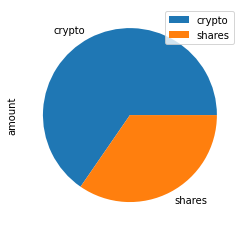

In [173]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', subplots=True)

In [204]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings = df_savings.sum()[0]
# Validate saving health
# YOUR CODE HERE!
if savings > emergency_fund:
    print('Congratulations! You have surpassed your financial goal')
elif savings == emergency_fund:
    print('Congratulations! You have reached your financial goal')
elif savings < emergency_fund:
    print(f'You are ${emergency_fund-savings} away from reaching your financial goal')

Congratulations! You have surpassed your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [118]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-21', tz='America/New_York').isoformat()

In [176]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# 1000 wasnt enough for 5 years I increased to 10000
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
df_stock_data = api.get_bars(
    tickers,
    tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit = 10000
).df
# Display sample data
df_stock_data.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-21 04:00:00+00:00,107.93,108.27,107.9300,108.27,2049680,12024,108.175725,AGG
2017-03-22 04:00:00+00:00,108.44,108.54,108.3600,108.42,2643641,11111,108.455049,AGG
2017-03-23 04:00:00+00:00,108.44,108.51,108.2635,108.45,2071485,10901,108.417635,AGG
2017-03-24 04:00:00+00:00,108.35,108.51,108.3100,108.36,3374871,11229,108.398485,AGG
2017-03-27 04:00:00+00:00,108.65,108.71,108.5345,108.62,1977292,11112,108.600681,AGG


In [205]:
#Function to convert dataframe into a form mc_simulation is expecting
def format_MCSimulation(df_ticker):
    ticker_list = df_ticker['symbol'].unique()
    df_ = pd.DataFrame()
    for ticker in ticker_list:
        df_ticker_reformatted = df_ticker[df_ticker['symbol'] == ticker]
        df_ticker_reformatted.columns = pd.MultiIndex.from_product([[ticker],df_ticker.columns])
        if df_.empty:
            df_ = df_ticker_reformatted
        else:
            df_ = pd.concat([df_,
                            df_ticker_reformatted],
                            axis = 1,
                            join='inner')

    return df_

df_stock_reformatted = format_MCSimulation(df_stock_data)
df_stock_reformatted.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2017-03-21 04:00:00+00:00       12024  108.175725    AGG  237.49  237.61   
2017-03-22 04:00:00+00:00       11111  108.455049    AGG  233.78  234.61   
2017-03-23 04:00:00+00:00       10901  108.417635    AGG  234.01  235.34   
2017-03-24 04:00:00+00:00       11229  108.398485    AGG  234.35  235.04   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG  231.97  233.92   

                                                                               \
                              low    close     volume trade_count        vwap   
timestamp                                                                       
2017-03-21 04:00:00+00:00  233.58  233.760  131809275      443599  234.853857   
2017-03-22 04:00:00+00:00  233.05  234.250   97569204      307469  233.932509   
2017-03-23 04:00:00+00:00  233.60  233.940  100410277      333903  234.388790   
2017-03-24 04:00:00+00:00  232.96  233.880  112504853      359600  234.080978   
2017-03-27 04:00:00+00:00  231.61  233.575   87454452      289784  233.041576   

                                  
                          symbol  
timestamp                         
2017-03-21 04:00:00+00:00    SPY  
2017-03-22 04:00:00+00:00    SPY  
2017-03-23 04:00:00+00:00    SPY  
2017-03-24 04:00:00+00:00    SPY  
2017-03-27 04:00:00+00:00    SPY

In [178]:
# Printing the simulation input data
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_reformatted,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-03-21 04:00:00+00:00       12024  108.175725    AGG          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049    AGG     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635    AGG     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    AGG    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-03-21 04:00:00+00:00  234.853857    SPY          NaN  
2017-03-22 04:00:00+00:00  233.932509    SPY     0.002096  
2017-03-23 04:00:00+00:00  234.388790    SPY    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    SPY    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    SPY    -0.001304

In [179]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\peeta\Desktop\Unit-5-homework\Unit-5-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994737,0.996746,0.999237,0.998780,1.007959,1.005144,0.997871,1.001961,1.001230,0.991620,...,1.001878,0.999210,0.992588,1.001410,1.002840,1.002013,1.001697,0.999136,0.995178,1.000216
2,0.995493,0.987788,0.999992,0.999428,1.006409,1.008880,0.990540,0.999868,0.998895,0.985879,...,0.996143,1.006657,0.990061,1.006107,1.002240,0.995372,1.000788,1.002917,0.986184,1.001247
3,0.992101,0.991245,1.001760,1.002298,1.005733,0.995799,0.983287,0.998173,0.998669,0.983041,...,0.991623,1.008720,0.987817,1.010016,1.009764,0.990597,1.001160,1.006963,0.999265,0.996236
4,0.986328,0.994301,1.007493,1.001422,1.007294,1.001791,0.984902,0.984426,0.997822,0.991995,...,0.990875,1.007918,0.982551,1.020546,1.015860,0.993502,0.995509,1.011506,0.994504,0.995692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.075358,5.947779,4.514166,3.423631,7.586865,4.695362,6.350084,8.444311,5.298151,6.554273,...,4.916013,4.225134,3.116997,6.860888,4.919132,4.595151,6.229263,3.960206,5.249570,3.823154
7557,4.066314,5.960368,4.523554,3.431596,7.542396,4.666328,6.309338,8.427182,5.269350,6.529876,...,4.889059,4.237368,3.099144,6.940975,4.903220,4.574357,6.241968,3.945088,5.229667,3.813477
7558,4.028750,5.954238,4.521317,3.417706,7.587838,4.654118,6.292854,8.442332,5.312561,6.515258,...,4.894984,4.241905,3.130081,6.919739,4.907060,4.539070,6.267355,3.955952,5.238794,3.812574
7559,4.046247,5.935573,4.550480,3.394782,7.557044,4.672921,6.261407,8.415976,5.284169,6.534515,...,4.877958,4.237884,3.154298,6.935694,4.895164,4.591891,6.300847,3.960744,5.211737,3.815243


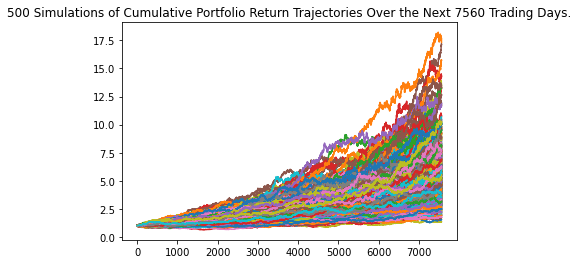

In [180]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# Saving figure
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

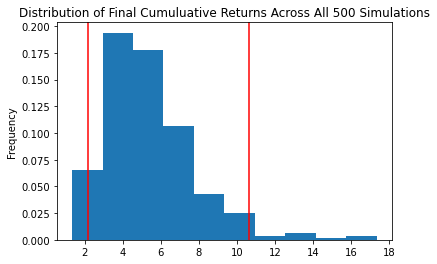

In [182]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()
# saving figure
dist_plot.get_figure().savefig('MC_thirty_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [183]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_thirty = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_thirty)

count           500.000000
mean              5.394887
std               2.362270
min               1.340047
25%               3.779077
50%               4.975931
75%               6.484615
max              17.325988
95% CI Lower      2.173635
95% CI Upper     10.649583
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [184]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower_thirty = round(tbl_thirty[8]*initial_investment,2)
ci_upper_thirty = round(tbl_thirty[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43472.7 and $212991.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [185]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_thirty = round(tbl_thirty[8]*initial_investment,2)
ci_upper_thirty = round(tbl_thirty[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65209.05 and $319487.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [188]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# For a five year retirement plan I increase the weighting of SPY to 90%
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_reformatted,
    weights = [.10, .90],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-03-21 04:00:00+00:00       12024  108.175725    AGG          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049    AGG     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635    AGG     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    AGG    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-03-21 04:00:00+00:00  234.853857    SPY          NaN  
2017-03-22 04:00:00+00:00  233.932509    SPY     0.002096  
2017-03-23 04:00:00+00:00  234.388790    SPY    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    SPY    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    SPY    -0.001304

In [189]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\peeta\Desktop\Unit-5-homework\Unit-5-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002255,0.987794,1.003139,0.982880,0.995809,0.981787,1.006235,0.994917,1.022425,1.009607,...,1.001087,1.014391,0.987207,1.012238,1.017600,0.984642,1.002256,0.996383,1.008412,0.999601
2,0.990994,1.006843,0.996554,0.977763,1.001223,0.990049,1.004560,0.994242,1.023247,1.024439,...,1.003433,1.025701,0.991543,1.026115,1.031051,1.005160,0.995276,0.987523,1.014903,0.985201
3,1.000416,1.008977,1.012441,0.987687,0.989523,0.968051,1.005917,0.987101,1.032707,1.037648,...,1.007967,1.033809,0.997504,1.010566,1.039449,0.999814,0.997689,0.981784,0.997400,0.998657
4,1.010460,1.024145,1.027014,0.974551,0.997380,0.984002,1.016761,1.008163,1.027704,1.025938,...,0.988284,1.044150,0.970734,0.994367,1.048320,1.001291,0.998841,0.970508,1.009292,0.995016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.298772,2.411821,1.162543,1.042877,2.076466,3.265324,2.129025,1.108886,2.289742,3.321961,...,1.923204,1.179077,1.954922,1.421158,0.878408,1.629013,1.943295,1.721823,1.968177,1.233384
1257,1.288195,2.418430,1.159410,1.051641,2.059016,3.305781,2.144575,1.120097,2.331653,3.324396,...,1.925117,1.203082,1.929384,1.438745,0.894472,1.647461,1.950611,1.741428,1.931440,1.230552
1258,1.288225,2.408818,1.149496,1.049775,2.074633,3.256225,2.145529,1.123330,2.329201,3.310663,...,1.894018,1.222982,1.952955,1.445477,0.872060,1.640717,1.914295,1.728610,1.934664,1.249481
1259,1.285194,2.410504,1.171652,1.043849,2.032468,3.243816,2.179239,1.114730,2.347390,3.300697,...,1.900164,1.221231,1.957271,1.447668,0.880945,1.667912,1.929190,1.788668,1.936156,1.233766


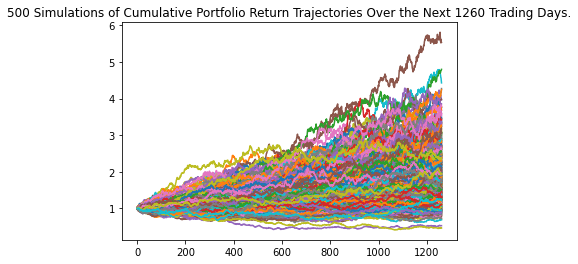

In [196]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

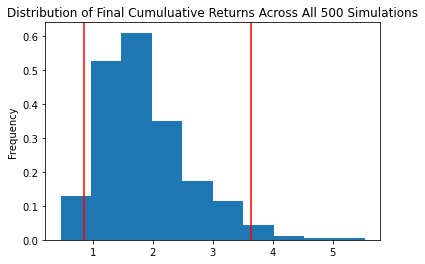

In [191]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [192]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.880328
std               0.743062
min               0.462699
25%               1.345701
50%               1.742730
75%               2.265170
max               5.539388
95% CI Lower      0.853295
95% CI Upper      3.644159
Name: 1260, dtype: float64


In [193]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17065.89 and $72883.18


### Ten Years Retirement Option

In [194]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
# For the ten year retirement. I select a portfolio more risky than the 30 year plan but less risky than the 5 year plan. I place a 70% weighting on SPY
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_reformatted,
    weights = [.30, .70],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-03-21 04:00:00+00:00       12024  108.175725    AGG          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049    AGG     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635    AGG     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    AGG    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG     0.002399  231.97   

                                                                           \
                             high     low    close     volume trade_count   
timestamp                                                                   
2017-03-21 04:00:00+00:00  237.61  233.58  233.760  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.250   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.940  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.880  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.575   87454452      289784   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-03-21 04:00:00+00:00  234.853857    SPY          NaN  
2017-03-22 04:00:00+00:00  233.932509    SPY     0.002096  
2017-03-23 04:00:00+00:00  234.388790    SPY    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    SPY    -0.000256  
2017-03-27 04:00:00+00:00  233.041576    SPY    -0.001304

In [195]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\peeta\Desktop\Unit-5-homework\Unit-5-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994211,0.988554,0.997416,1.005848,0.995754,0.997460,0.996147,1.006351,1.009094,1.002760,...,1.006575,1.002832,1.020757,0.985409,1.009181,0.986094,0.997377,0.992350,0.998543,0.987023
2,1.013454,0.973709,1.002585,1.007552,0.987166,0.987740,0.991053,1.005544,1.023715,1.015798,...,1.011646,0.994472,1.009856,0.986902,1.000860,0.971951,1.006812,0.992326,1.015652,0.999609
3,1.016727,0.982058,1.005778,1.013879,0.975371,0.982533,0.985646,1.003371,1.023626,1.011915,...,1.008878,1.006491,1.005708,0.985491,1.004974,0.973335,0.994554,0.984470,1.008173,0.987532
4,1.014888,0.982284,1.024850,1.024392,0.972183,0.984686,0.985775,1.016605,1.028550,0.998594,...,1.010223,0.997403,0.992431,0.994722,1.000558,0.977061,0.991652,0.977648,0.998811,0.975320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.434111,2.262285,1.144585,3.003986,1.743377,2.191214,1.800364,2.719758,4.090845,1.803429,...,2.622136,1.664261,1.582838,3.857954,0.917181,1.837563,4.215148,1.937683,3.768324,3.261591
2517,2.405438,2.276170,1.154269,2.985049,1.740247,2.179844,1.807179,2.696568,4.119097,1.814521,...,2.640626,1.661305,1.573799,3.843548,0.912990,1.845603,4.283491,1.938448,3.763920,3.294797
2518,2.406891,2.258751,1.153946,2.937538,1.748737,2.171359,1.794421,2.688813,4.113728,1.850949,...,2.644688,1.682220,1.577248,3.897701,0.911658,1.834001,4.298969,1.933611,3.753066,3.330309
2519,2.367924,2.255396,1.164330,2.907007,1.747382,2.191110,1.779974,2.675055,4.114870,1.842872,...,2.633446,1.682870,1.569066,3.980156,0.903214,1.833112,4.261084,1.929778,3.749297,3.278319


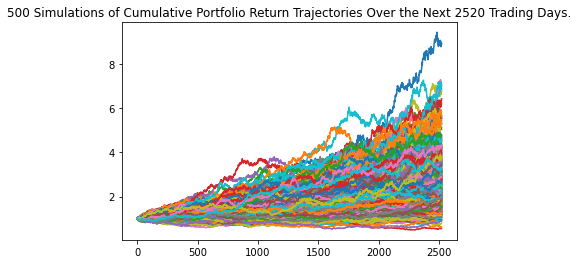

In [197]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

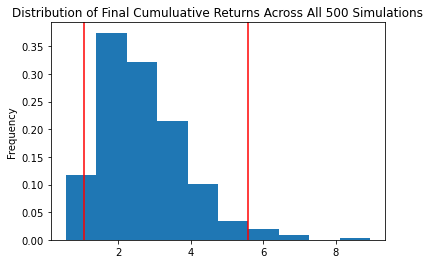

In [198]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_tenyear.plot_distribution()
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [199]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              2.706383
std               1.188319
min               0.563478
25%               1.813302
50%               2.530335
75%               3.392191
max               8.945962
95% CI Lower      1.073332
95% CI Upper      5.585711
Name: 2520, dtype: float64


In [200]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $21466.63 and $111714.23
